In [138]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

In [139]:
import numpy as np

In [140]:
from scrinet.workflow import pipe_utils

In [141]:
from scrinet.workflow import generators

In [142]:
from scrinet.interfaces import rotations

In [143]:
x, alpha, coords = pipe_utils.load_data("alpha", "train_wf_data")
_, beta, _ = pipe_utils.load_data("beta", "train_wf_data")
_, gamma, _ = pipe_utils.load_data("gamma", "train_wf_data")

_, amp, _ = pipe_utils.load_data("amp", "train_wf_data")
_, phase, _ = pipe_utils.load_data("phase", "train_wf_data")

In [144]:
coords[10]

array([1.64728606, 0.32145411, 0.29750124])

In [145]:
coords

array([[ 4.96346932e+00,  8.38275946e-02,  3.72323533e-03],
       [ 4.53400880e+00,  2.70205499e-01, -8.69392889e-01],
       [ 4.69226250e+00,  7.78289442e-01, -1.48955101e-01],
       [ 7.64087814e+00,  4.55217878e-01, -4.40029259e-01],
       [ 7.98106336e+00,  7.40580774e-01,  1.35698073e-01],
       [ 5.83098668e+00,  8.42761517e-02,  8.83778892e-02],
       [ 2.66159898e+00,  2.49696998e-01, -9.50181770e-01],
       [ 5.07428109e+00,  7.26051174e-01,  5.87132117e-02],
       [ 6.40208057e+00,  4.96339861e-01,  4.80655916e-01],
       [ 6.01262981e+00,  5.43862093e-01, -2.90438512e-02],
       [ 1.64728606e+00,  3.21454111e-01,  2.97501238e-01],
       [ 1.47694380e+00,  7.42793108e-01,  3.65563032e-02],
       [ 5.76173126e+00,  4.24005844e-02,  4.32560848e-01],
       [ 1.99770547e+00,  5.30996317e-01, -6.50058040e-01],
       [ 2.28332638e+00,  4.85358290e-01, -2.32449578e-02],
       [ 4.57647500e+00,  7.43868023e-01,  2.20848178e-01],
       [ 2.52101689e+00,  3.33004320e-01

In [146]:
idx = 10

In [147]:
q, chi1x, chi1z = coords[idx]

In [148]:
import phenom

In [149]:
m1, m2 = phenom.m1_m2_M_q(M=60, q=q)

In [150]:
thetaJN, alpha0, phi_aligned = rotations.compute_L_to_J_angles(
    m1,
    m2,
    10,
    0,
    0,
    chi1x,
    0,
    chi1z,
    0,
    0,
    0)

In [151]:
thetaJN, alpha0, phi_aligned

(0.09431805664017477, 1.2246467991473532e-16, -0.0)

In [152]:
alpha_, beta_, gamma_ = alpha[idx], beta[idx], gamma[idx]

In [153]:
amp_ = amp[idx]
phase_ = phase[idx]

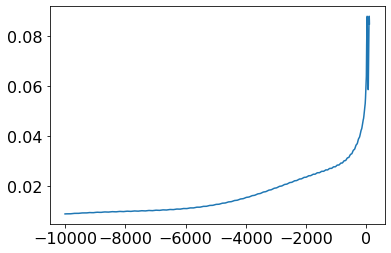

In [154]:
plt.figure()
plt.plot(x, beta_)
# plt.xlim(-100,100)

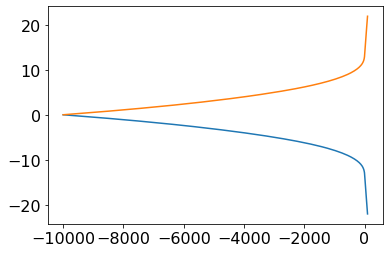

In [155]:
plt.figure()
plt.plot(x, alpha_)
plt.plot(x, gamma_)
# plt.xlim(-100,100)

In [156]:
hlms={}
hlms.update({
    (2,2):amp_*np.exp(1.j*phase_),
    (2,1):np.zeros(len(amp_)),
    (2,0):np.zeros(len(amp_)),
    (2,-1):np.zeros(len(amp_)),
    (2,-2):amp_*np.exp(-1.j*phase_)
})

In [157]:
wr = rotations.WaveformRotations(x, hlms, frame='coprec', alpha=alpha_, beta=beta_, gamma=gamma_)

In [158]:
wr.hlms[(2,2)]

array([ 3.20048970e-01+0.j        ,  3.19664889e-01-0.01598938j,
        3.18482317e-01-0.03194161j, ..., -1.19917643e-03+0.00059949j,
        7.59218598e-05+0.00113087j,  9.05871536e-04+0.00030917j])

Text(0.5, 1.0, 'coprec')

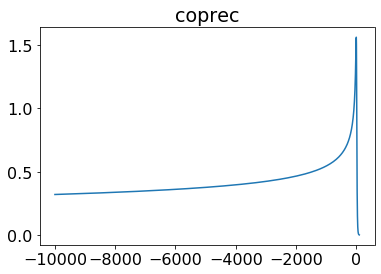

In [159]:
plt.figure()
plt.plot(wr.times, np.abs(wr.hlms[(2,2)]))
plt.title(wr.frame)

In [160]:
# wr.from_coprecessing_frame_to_j_frame()

In [161]:
# plt.figure()
# plt.plot(wr.times, np.abs(wr.hlms[(2,2)]))
# plt.title(wr.frame)
# plt.xlim(-1000,100)

In [162]:
# to go from coprec frame to inertial-L frame we need to the angles to go from
# inertial-J to inertial-L
wr.set_alpha0_thetaJN_phi0(alpha0, thetaJN, phi_aligned)

In [163]:
# wr.frame

In [164]:
# wr.from_j_frame_to_inertial_frame()

In [165]:
wr.from_coprecessing_frame_to_inertial_frame()

Text(0.5, 1.0, 'inertial-L')

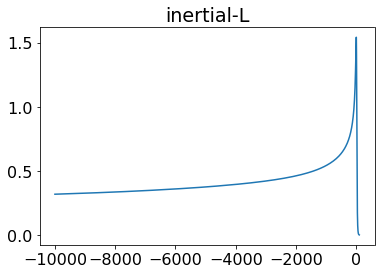

In [166]:
plt.figure()
plt.plot(wr.times, np.abs(wr.hlms[(2,2)]))
plt.title(wr.frame)

In [167]:
chi, theta, phi = generators.cart_to_polar(chi1x, 0, chi1z)

In [168]:
import lalsimulation as lalsim

In [169]:
new_times, ts_amp, ts_phase, ts_freq, ts_hreal, ts_himag, ts_coords = generators.gen_3d_prec_single_spin_data(
    [q], [chi], [theta], 60, 1, approximant=lalsim.SEOBNRv4PHM, modes=[[2,2]]
)

In [170]:
def get_peak_time(t, amp):
    return t[np.argmax(amp)]

In [171]:
tshift = get_peak_time(new_times, ts_amp[0]) - get_peak_time(wr.times, np.abs(wr.hlms[(2,2)]))

(-1000, 100)

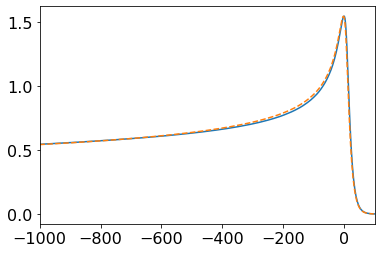

In [172]:
plt.figure()
plt.plot(new_times, ts_amp[0])
plt.plot(wr.times+tshift, np.abs(wr.hlms[(2,2)]), ls='--')
plt.xlim(-1000, 100)

(-1000, 100)

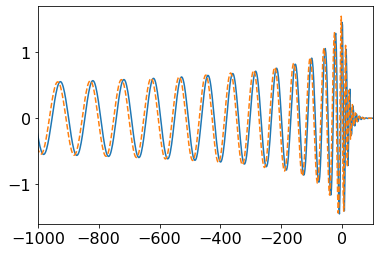

In [173]:
plt.figure()
plt.plot(new_times, np.real(ts_amp[0]*np.exp(1.j*ts_phase[0])))
plt.plot(wr.times+tshift, np.real(wr.hlms[(2,2)]), ls='--')
plt.xlim(-1000, 100)

(-1000, 100)

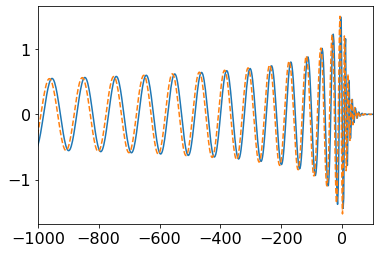

In [174]:
plt.figure()
plt.plot(new_times, np.imag(ts_amp[0]*np.exp(1.j*ts_phase[0])))
plt.plot(wr.times+tshift, np.imag(wr.hlms[(2,2)]), ls='--')
plt.xlim(-1000, 100)

# look at some

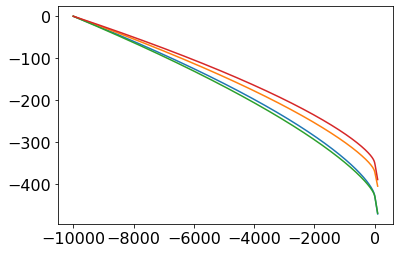

In [175]:
plt.figure()

plt.plot(x, phase[0])
plt.plot(x, phase[1])
plt.plot(x, phase[3])
plt.plot(x, phase[6])

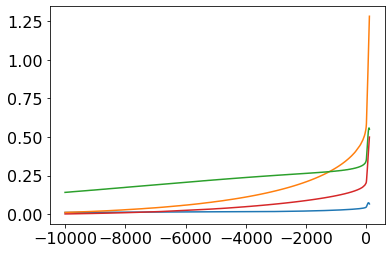

In [180]:
plt.figure()

plt.plot(x, beta[0])
plt.plot(x, beta[1])
plt.plot(x, beta[3])
plt.plot(x, beta[6])

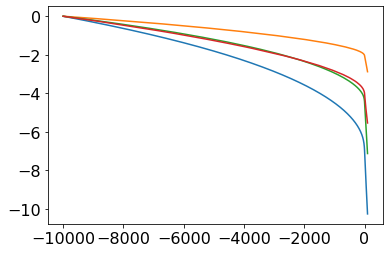

In [177]:
plt.figure()

plt.plot(x, alpha[0])
plt.plot(x, alpha[1])
plt.plot(x, alpha[3])
plt.plot(x, alpha[6])

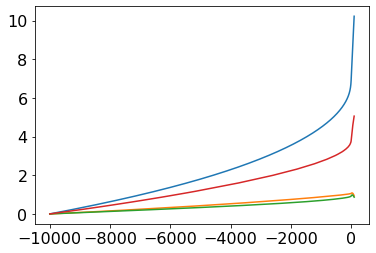

In [178]:
plt.figure()

plt.plot(x, gamma[0])
plt.plot(x, gamma[1])
plt.plot(x, gamma[3])
plt.plot(x, gamma[6])